In [792]:
#!/Tsan/bin/python
# -*- coding: utf-8 -*-

In [793]:
# Libraries to use
from __future__ import division 
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import mysql.connector 
import json
import collections

In [794]:
# Import My own library for factor testing
from SingleFactorTest import factorFilterFunctions as ff
#from config import *

In [795]:
%matplotlib inline
%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [796]:
# {'600036':u'招商银行','002142':u'宁波银行','601939':u'建设银行','000709':u'河钢股份','000807':u'云铝股份','600111':u'北方稀土',
#  '002001':u'新和成','002562':u'兄弟科技','0300121':u'阳谷华泰','600352':u'浙江龙盛','600409':u'三友化工','000636':u'风华高科',
#  '000962':u'东方钽业','300228':u'富瑞特装'，'600681':u'百川能源','600789':u'鲁抗医药','002166':u'莱茵生物','002166':u'万华化学',
# '000933':u'神火股份','600977':u'中国电影','000802':u'北京文化','600809':u'山西汾酒','600438':u'通威股份','000970':u'中科三环'}

In [797]:
# 股票推荐字典
stkdict = {'20170815':['600036','002142','601939'], '20170814':['000709','000807','600111','002001','002562'],\
          '20170810':['300121','600352','600409'], '20170809':['000636','000962'], '20170808':['600803','300228','600681'],
          '20170807':['600789','002166','600309'],'20170803':['000933','600977','000802','600809'],
          '20170801':['600438'], '20170731':['600438','600111','000970']}

In [798]:
sortedstkdict = collections.OrderedDict(sorted(stkdict.items()))

In [799]:
fileNameClose = 'LZ_CN_STKA_QUOTE_TCLOSE.h5.csv'
fileNameOpen = 'LZ_CN_STKA_QUOTE_TOPEN.h5.csv'

In [800]:
path = ff.data_path
# Constants
startTime =  datetime.strptime('20170731', '%Y%m%d')
endTime = datetime.strptime('20170816', '%Y%m%d')

In [801]:
# 开盘价
openPrice= pd.read_csv(path+fileNameOpen,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]

stkList = map(lambda x: x.split('.')[0],openPrice.columns[1:])

openPrice = openPrice.iloc[:,:-1]

openPrice.columns = stkList 

In [802]:
# 收盘价
closePrice= pd.read_csv(path+fileNameClose,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]

stkList = map(lambda x: x.split('.')[0],closePrice.columns[1:])

closePrice = closePrice.iloc[:,:-1]

closePrice.columns = stkList

In [803]:
closePrice

,000005,600601,600602,600651,600652,600653,600654,600656,000004,000002,...,603535,300689,603458,300688,603602,300691,603721,601326,002892,603776
2017-07-31,4.94,3.87,7.16,9.12,9.86,3.26,13.48,NaN,22.31,23.37,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,4.96,3.86,7.22,8.95,10.03,3.26,13.48,NaN,22.36,23.42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-02,4.93,3.84,7.00,8.87,10.27,3.26,13.48,NaN,21.85,23.58,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-03,4.94,3.83,7.70,9.04,10.21,3.26,13.48,NaN,22.22,23.11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-04,4.9,3.84,7.72,8.93,9.76,3.26,13.48,NaN,21.88,22.84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-07,4.89,3.85,7.62,8.95,9.82,3.26,13.48,NaN,22.00,22.71,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-08,4.88,3.86,7.59,8.88,9.78,3.26,13.48,NaN,21.91,22.77,...,21.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-09,4.88,3.86,7.57,8.89,9.75,3.26,13.48,NaN,22.17,22.95,...,24.02,20.72,42.28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-10,4.83,3.80,7.87,8.69,9.58,3.26,13.48,NaN,21.80,22.80,...,26.42,22.79,46.51,15.48,21.86,NaN,NaN,NaN,NaN,NaN
2017-08-11,4.76,3.71,7.92,8.55,9.55,3.26,13.48,NaN,22.01,22.02,...,29.06,25.07,50.60,17.03,24.05,22.98,10.15,NaN,NaN,NaN


In [804]:
InitiCap = 100000  # 初始资金
capital = InitiCap  
feeRate = 0.0003  # 手续费+冲击成本
stampTaxRate = 0.001  # 印花税
buyList = []
availableCash = {}  # 每天的现金流量
# 生成购买的股票池
for key,item in sortedstkdict.iteritems():
    print key
    date = datetime.strptime(key, '%Y%m%d')
    totalCostToday = 0  # 当天买入的所有股票的成本
    for stk in item:        
        buyPrice = round(openPrice.loc[date][stk],2)
        amount = 100
        cost = round(buyPrice*amount*(1+feeRate),2)
        buyList.append([date,stk,buyPrice,amount,cost,1]) # 日期，股票代码，购买价格，购买数量，总cost,方向
        totalCostToday+= cost
    assert capital > totalCostToday
    capital  = capital  - totalCostToday
    availableCash[date] = capital  # 买入股票后剩下的资金

20170731
20170801
20170803
20170807
20170808
20170809
20170810
20170814
20170815


In [805]:
availableCash

{datetime.datetime(2017, 7, 31, 0, 0): 95882.77,
 datetime.datetime(2017, 8, 1, 0, 0): 95158.55,
 datetime.datetime(2017, 8, 3, 0, 0): 86145.85,
 datetime.datetime(2017, 8, 7, 0, 0): 80668.20000000001,
 datetime.datetime(2017, 8, 8, 0, 0): 76512.95000000001,
 datetime.datetime(2017, 8, 9, 0, 0): 74508.35,
 datetime.datetime(2017, 8, 10, 0, 0): 70507.15000000001,
 datetime.datetime(2017, 8, 14, 0, 0): 63355.00000000001,
 datetime.datetime(2017, 8, 15, 0, 0): 58697.61000000001}

In [806]:
dateList = sorted([datetime.strptime(key, '%Y%m%d') for key in stkdict.keys()])

dateList = closePrice.loc[dateList[0]:dateList[-1]].index

dateList

DatetimeIndex(['2017-07-31', '2017-08-01', '2017-08-02', '2017-08-03',
               '2017-08-04', '2017-08-07', '2017-08-08', '2017-08-09',
               '2017-08-10', '2017-08-11', '2017-08-14', '2017-08-15'],
              dtype='datetime64[ns]', freq=None)

In [807]:
availableCash 

{datetime.datetime(2017, 7, 31, 0, 0): 95882.77,
 datetime.datetime(2017, 8, 1, 0, 0): 95158.55,
 datetime.datetime(2017, 8, 3, 0, 0): 86145.85,
 datetime.datetime(2017, 8, 7, 0, 0): 80668.20000000001,
 datetime.datetime(2017, 8, 8, 0, 0): 76512.95000000001,
 datetime.datetime(2017, 8, 9, 0, 0): 74508.35,
 datetime.datetime(2017, 8, 10, 0, 0): 70507.15000000001,
 datetime.datetime(2017, 8, 14, 0, 0): 63355.00000000001,
 datetime.datetime(2017, 8, 15, 0, 0): 58697.61000000001}

In [808]:
availableCashSeries = pd.Series(index = dateList,data = availableCash )

availableCashSeries = availableCashSeries.ffill()

availableCashSeries

2017-07-31    95882.77
2017-08-01    95158.55
2017-08-02    95158.55
2017-08-03    86145.85
2017-08-04    86145.85
2017-08-07    80668.20
2017-08-08    76512.95
2017-08-09    74508.35
2017-08-10    70507.15
2017-08-11    70507.15
2017-08-14    63355.00
2017-08-15    58697.61
dtype: float64

In [809]:
availableCashSeries

2017-07-31    95882.77
2017-08-01    95158.55
2017-08-02    95158.55
2017-08-03    86145.85
2017-08-04    86145.85
2017-08-07    80668.20
2017-08-08    76512.95
2017-08-09    74508.35
2017-08-10    70507.15
2017-08-11    70507.15
2017-08-14    63355.00
2017-08-15    58697.61
dtype: float64

In [810]:
buyList

[[datetime.datetime(2017, 7, 31, 0, 0), '600438', 6.5, 100, 650.19, 1],
 [datetime.datetime(2017, 7, 31, 0, 0), '600111', 17.1, 100, 1710.51, 1],
 [datetime.datetime(2017, 7, 31, 0, 0), '000970', 17.56, 100, 1756.53, 1],
 [datetime.datetime(2017, 8, 1, 0, 0), '600438', 7.24, 100, 724.22, 1],
 [datetime.datetime(2017, 8, 3, 0, 0), '000933', 11.71, 100, 1171.35, 1],
 [datetime.datetime(2017, 8, 3, 0, 0), '600977', 18.08, 100, 1808.54, 1],
 [datetime.datetime(2017, 8, 3, 0, 0), '000802', 19.07, 100, 1907.57, 1],
 [datetime.datetime(2017, 8, 3, 0, 0), '600809', 41.24, 100, 4125.24, 1],
 [datetime.datetime(2017, 8, 7, 0, 0), '600789', 8.95, 100, 895.27, 1],
 [datetime.datetime(2017, 8, 7, 0, 0), '002166', 11.5, 100, 1150.35, 1],
 [datetime.datetime(2017, 8, 7, 0, 0), '600309', 34.31, 100, 3432.03, 1],
 [datetime.datetime(2017, 8, 8, 0, 0), '600803', 13.91, 100, 1391.42, 1],
 [datetime.datetime(2017, 8, 8, 0, 0), '300228', 11.18, 100, 1118.34, 1],
 [datetime.datetime(2017, 8, 8, 0, 0), '6006

In [811]:
# 简单回测
cutwinthreshold = 0.05
cutlossthreshold  = -0.05
pnldict = {}
sellList = []
for tradeitem in buyList:
    pnl = (closePrice.loc[tradeitem[0]:][tradeitem[1]] - tradeitem[2]) / tradeitem[2]  # 计算每天的pnl
    cutwin = pnl[pnl >= cutwinthreshold]
    cutloss = pnl[pnl <= cutlossthreshold]
    if len(cutwin) > 0:    # 如果达到止盈线，则按当天收盘价止盈
        pnldict[tradeitem[1]] = round(cutwin .iloc[0],2)
        selldate = cutwin.index[0]
        sellPrice = closePrice.loc[selldate][tradeitem[1]]
        cost = round(sellPrice*tradeitem[3]*(1-stampTaxRate),2)
        sellList.append([selldate,tradeitem[1],round(sellPrice,2),tradeitem[3],cost,-1]) # 卖出list的格式与买入相同
        availableCashSeries.loc[selldate:]+= cost   # 记录到资金账户里
    elif  len(cutloss) > 0:     #  反之则止损
        pnldict[tradeitem[1]] = round(cutloss .iloc[0],2)
        selldate = cutloss.index[0]
        sellPrice = closePrice.loc[selldate][tradeitem[1]]
        cost = round(sellPrice*tradeitem[3]*(1-stampTaxRate),2)
        sellList.append([selldate,tradeitem[1],round(sellPrice,2),tradeitem[3],cost,-1]) # 卖出list的格式与买入相同
        availableCashSeries.loc[selldate:]+= cost 
    else:                                   # 没有达到止盈止损线的情况下，按照倒数第二天的收盘价计算pnl
        pnldict[tradeitem[1]] = round(pnl.iloc[-2],2)

In [812]:
sellList

[[Timestamp('2017-07-31 00:00:00'), '600438', 7.11, 100, 710.29, -1],
 [Timestamp('2017-07-31 00:00:00'), '600111', 18.61, 100, 1859.14, -1],
 [Timestamp('2017-08-09 00:00:00'), '000970', 18.78, 100, 1876.12, -1],
 [Timestamp('2017-08-04 00:00:00'), '000933', 12.35, 100, 1233.77, -1],
 [Timestamp('2017-08-04 00:00:00'), '000802', 20.74, 100, 2071.93, -1],
 [Timestamp('2017-08-07 00:00:00'), '600809', 43.99, 100, 4394.6, -1],
 [Timestamp('2017-08-09 00:00:00'), '600789', 9.43, 100, 942.06, -1],
 [Timestamp('2017-08-08 00:00:00'), '002166', 12.11, 100, 1209.79, -1],
 [Timestamp('2017-08-11 00:00:00'), '600309', 31.44, 100, 3140.86, -1],
 [Timestamp('2017-08-14 00:00:00'), '600803', 14.84, 100, 1482.52, -1],
 [Timestamp('2017-08-10 00:00:00'), '000636', 9.51, 100, 950.05, -1],
 [Timestamp('2017-08-14 00:00:00'), '000962', 10.54, 100, 1052.95, -1],
 [Timestamp('2017-08-11 00:00:00'), '300121', 14.75, 100, 1473.53, -1],
 [Timestamp('2017-08-11 00:00:00'), '600352', 10.51, 100, 1049.95, -1],

In [813]:
holdingList = list(set([i[1] for i in buyList]) - set([i[1] for i in sellList]))

In [814]:
holdingList

['000807',
 '600681',
 '600036',
 '000709',
 '002001',
 '600977',
 '002142',
 '601939',
 '300228']

In [815]:
selldatepair = {i[1]:i[0] for i in buyList if i[1] in holdingList}
selldatepair

{'000709': datetime.datetime(2017, 8, 14, 0, 0),
 '000807': datetime.datetime(2017, 8, 14, 0, 0),
 '002001': datetime.datetime(2017, 8, 14, 0, 0),
 '002142': datetime.datetime(2017, 8, 15, 0, 0),
 '300228': datetime.datetime(2017, 8, 8, 0, 0),
 '600036': datetime.datetime(2017, 8, 15, 0, 0),
 '600681': datetime.datetime(2017, 8, 8, 0, 0),
 '600977': datetime.datetime(2017, 8, 3, 0, 0),
 '601939': datetime.datetime(2017, 8, 15, 0, 0)}

In [816]:
tempo = closePrice[holdingList]

In [817]:
position = tempo.copy()
for stk,date in selldatepair.iteritems():
    filterCondition = tempo[tempo[stk].index >= date]
    falseCondition= tempo[tempo[stk].index  < date]
    position.loc[filterCondition.index,stk]= 100
    position.loc[falseCondition.index,stk]=  0
position

,000807,600681,600036,000709,002001,600977,002142,601939,300228
2017-07-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-03,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0
2017-08-04,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0
2017-08-07,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0
2017-08-08,0.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,100.0
2017-08-09,0.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,100.0
2017-08-10,0.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,100.0
2017-08-11,0.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,100.0


In [818]:
marketValue = position*tempo

In [819]:
marketValue.sum(axis=1)+availableCashSeries

2017-07-31     98452.20
2017-08-01     97727.98
2017-08-02     97727.98
2017-08-03     90568.28
2017-08-04     93836.98
2017-08-07     92755.93
2017-08-08     92554.47
2017-08-09     93353.05
2017-08-10     90225.90
2017-08-11     97028.05
2017-08-14     98265.37
2017-08-15    100142.28
2017-08-16          NaN
dtype: float64

In [820]:
# 计算卖出时得到的资金
for sellitem in sellList:
    availableCashSeries.loc[sellitem[0]]+= sellitem[-2]
availableCashSeries

2017-07-31    101021.63
2017-08-01     97727.98
2017-08-02     97727.98
2017-08-03     88715.28
2017-08-04     95326.68
2017-08-07     95332.53
2017-08-08     89202.26
2017-08-09     91624.23
2017-08-10     86704.95
2017-08-11     99459.20
2017-08-14     94521.84
2017-08-15     88723.58
dtype: float64

In [821]:
# 合并买卖订单
tradingList = buyList + sellList
tradingCode = list(set([i[1] for i in buyList]) | set([i[1] for i in sellList]))

In [822]:
tradingList

[[datetime.datetime(2017, 7, 31, 0, 0), '600438', 6.5, 100, 650.19, 1],
 [datetime.datetime(2017, 7, 31, 0, 0), '600111', 17.1, 100, 1710.51, 1],
 [datetime.datetime(2017, 7, 31, 0, 0), '000970', 17.56, 100, 1756.53, 1],
 [datetime.datetime(2017, 8, 1, 0, 0), '600438', 7.24, 100, 724.22, 1],
 [datetime.datetime(2017, 8, 3, 0, 0), '000933', 11.71, 100, 1171.35, 1],
 [datetime.datetime(2017, 8, 3, 0, 0), '600977', 18.08, 100, 1808.54, 1],
 [datetime.datetime(2017, 8, 3, 0, 0), '000802', 19.07, 100, 1907.57, 1],
 [datetime.datetime(2017, 8, 3, 0, 0), '600809', 41.24, 100, 4125.24, 1],
 [datetime.datetime(2017, 8, 7, 0, 0), '600789', 8.95, 100, 895.27, 1],
 [datetime.datetime(2017, 8, 7, 0, 0), '002166', 11.5, 100, 1150.35, 1],
 [datetime.datetime(2017, 8, 7, 0, 0), '600309', 34.31, 100, 3432.03, 1],
 [datetime.datetime(2017, 8, 8, 0, 0), '600803', 13.91, 100, 1391.42, 1],
 [datetime.datetime(2017, 8, 8, 0, 0), '300228', 11.18, 100, 1118.34, 1],
 [datetime.datetime(2017, 8, 8, 0, 0), '6006

In [823]:
# 创建tradingsheet
tradingSheet = pd.DataFrame(index = dateList, columns = tradingCode, data=0, dtype = float)

for item in tradingList:
    tradingSheet .loc[item[0],item[1]]+= item[-1] * item[-3]
positionchangeDF = tradingSheet .cumsum().ffill()

In [824]:
tradingSheet 

,600309,000807,600681,000802,000933,600036,000709,002001,600977,600809,...,300121,000970,000636,600352,002562,600409,600789,600803,600438,600111
2017-07-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0
2017-08-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-03,0.0,0.0,0.0,100.0,100.0,0.0,0.0,0.0,100.0,100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-04,0.0,0.0,0.0,-100.0,-100.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-07,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-100.0,...,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0
2017-08-08,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0
2017-08-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-100.0,100.0,0.0,0.0,0.0,-100.0,0.0,0.0,0.0
2017-08-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,100.0,0.0,-100.0,100.0,0.0,100.0,0.0,0.0,0.0,0.0
2017-08-11,-100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-100.0,0.0,0.0,-100.0,0.0,-100.0,0.0,0.0,0.0,0.0


In [825]:
positionchangeDF

,600309,000807,600681,000802,000933,600036,000709,002001,600977,600809,...,300121,000970,000636,600352,002562,600409,600789,600803,600438,600111
2017-07-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-08-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0
2017-08-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0
2017-08-03,0.0,0.0,0.0,100.0,100.0,0.0,0.0,0.0,100.0,100.0,...,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0
2017-08-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,...,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0
2017-08-07,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,...,0.0,100.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,0.0
2017-08-08,100.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,...,0.0,100.0,0.0,0.0,0.0,0.0,100.0,100.0,100.0,0.0
2017-08-09,100.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,...,0.0,0.0,100.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0
2017-08-10,100.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,...,100.0,0.0,0.0,100.0,0.0,100.0,0.0,100.0,100.0,0.0
2017-08-11,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0


In [826]:
# 总资产
totalCapital= (positionchangeDF * closePrice[positionchangeDF.columns]).sum(axis=1)+ availableCashSeries

In [827]:
totalCapital

2017-07-31    102851.63
2017-08-01    100220.98
2017-08-02    100169.98
2017-08-03    100238.28
2017-08-04    103575.68
2017-08-07    105161.53
2017-08-08    102026.26
2017-08-09    103794.23
2017-08-10    101743.95
2017-08-11    107070.20
2017-08-14    105125.84
2017-08-15    102556.58
2017-08-16          NaN
dtype: float64

In [828]:
# 年化收益率
annualizedRet = ((totalCapital.iloc[-2] - InitiCap)/ InitiCap +1)**(250/(len(totalCapital)-1)) -1

In [829]:
annualizedRet 

0.69202537164493205

In [830]:
availableCashSeries

2017-07-31    101021.63
2017-08-01     97727.98
2017-08-02     97727.98
2017-08-03     88715.28
2017-08-04     95326.68
2017-08-07     95332.53
2017-08-08     89202.26
2017-08-09     91624.23
2017-08-10     86704.95
2017-08-11     99459.20
2017-08-14     94521.84
2017-08-15     88723.58
dtype: float64

In [831]:
pnlseries = pd.Series(pnldict)

In [832]:
pnlseries.describe()

count    25.000000
mean      0.018400
std       0.053126
min      -0.080000
25%      -0.010000
50%       0.030000
75%       0.060000
max       0.090000
dtype: float64

(array([ 3.,  2.,  0.,  0.,  4.,  2.,  3.,  4.,  5.,  2.]),
 array([-0.08 , -0.063, -0.046, -0.029, -0.012,  0.005,  0.022,  0.039,
         0.056,  0.073,  0.09 ]),
 <a list of 10 Patch objects>)

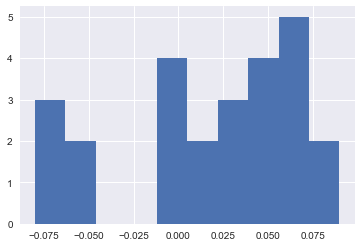

In [833]:
plt.hist(pnlseries)